# Insights Report

We present the marketing insights discovered from our analysis of the provided dataset. See the writeup for technical details.

In [5]:
import pandas as pd
from analysis import *

features_df = pd.read_csv("features.csv")
companies = pd.unique(features_df["label"])

posteriors_df, entropy = estimate_posteriors(features_df)

/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/analysis.py:25: RuntimeWarning: divide by zero encountered in log
  np.log(posteriors),


## Widespread Trends

### Enforcing Routine

Many companies deliberately enforce the idea of a grooming "routine" (involving their product) in their advertisements through repeated mentioning. This can be a powerful marketing tactic because customers who incorporate the product into a consistent routine become long-term, recurrent customers that generate a lot of revenue over time.

We discovered this insight by calculating each word's posterior distribution over the eight companies, then observing words with highest entropies (most widespread distributions). We plot a word cloud of high-entropy words and see that "routine" is featured prominently.

/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/analysis.py:25: RuntimeWarning: divide by zero encountered in log
  np.log(posteriors),


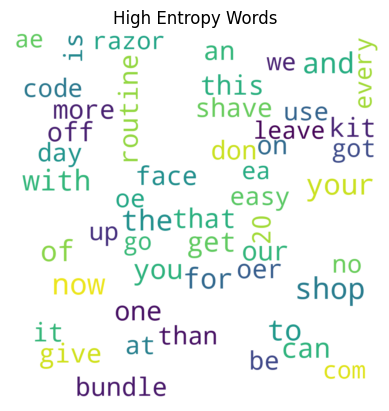

In [4]:
# display high-entropy words
wordcloud_cutoff(entropy, "High Entropy Words", cutoff=50)


We can examine which companies often mention "routine" and with what posterior probabilities.

In [ ]:
print(posteriors_df["routine"])

All companies in the dataset except for thebeardclub and sweatblock regularly mention "routine" in their ads, but athenaclub and manscaped receive highest probability. We provide several representative examples:

In [ ]:
# get ads that say routine

### Promotional Deals

Many companies provide special deals to customers to encourage purchases, facilitated through offers such as bundles, sales, and/or promotional codes.

We see from the word cloud that "bundle", "code", "save", and "20" (generally indicating 20 percent off) are high-entropy words. Again, we can examine the posterior distributions more closely to get in-depth insights.

In [ ]:
print(posteriors_df[["bundle", "code", "20", "save"]])

Manscaped, harrys and sweatblock are the most common users of bundle deals. Thebeardclub and athenaclub are the common users of promotional codes. Theartofshaving uses all strategies with regularity. We present several examples.

In [ ]:
# examples

### Simple Color Scheme and Visual Design

Most companies predominantly use ads with basic color schemes and simple, clean visual designs. This could be a useful approach for concisely conveying relevant information to the customer while displaying the product as a clear point-of-focus with little ambiguity. The ads that use this type of approach are very straightforward.

We can identify this trend by observing the plot of ad edge detection scores and color cluster variance scores. There are some ads that do have large scores in either dimension (especially from theartofshaving and thebeardclub) -- but we can see from the fitted gaussians that the ads are generally concentrated in regions with low edge detection score and moderately low color cluster variance.

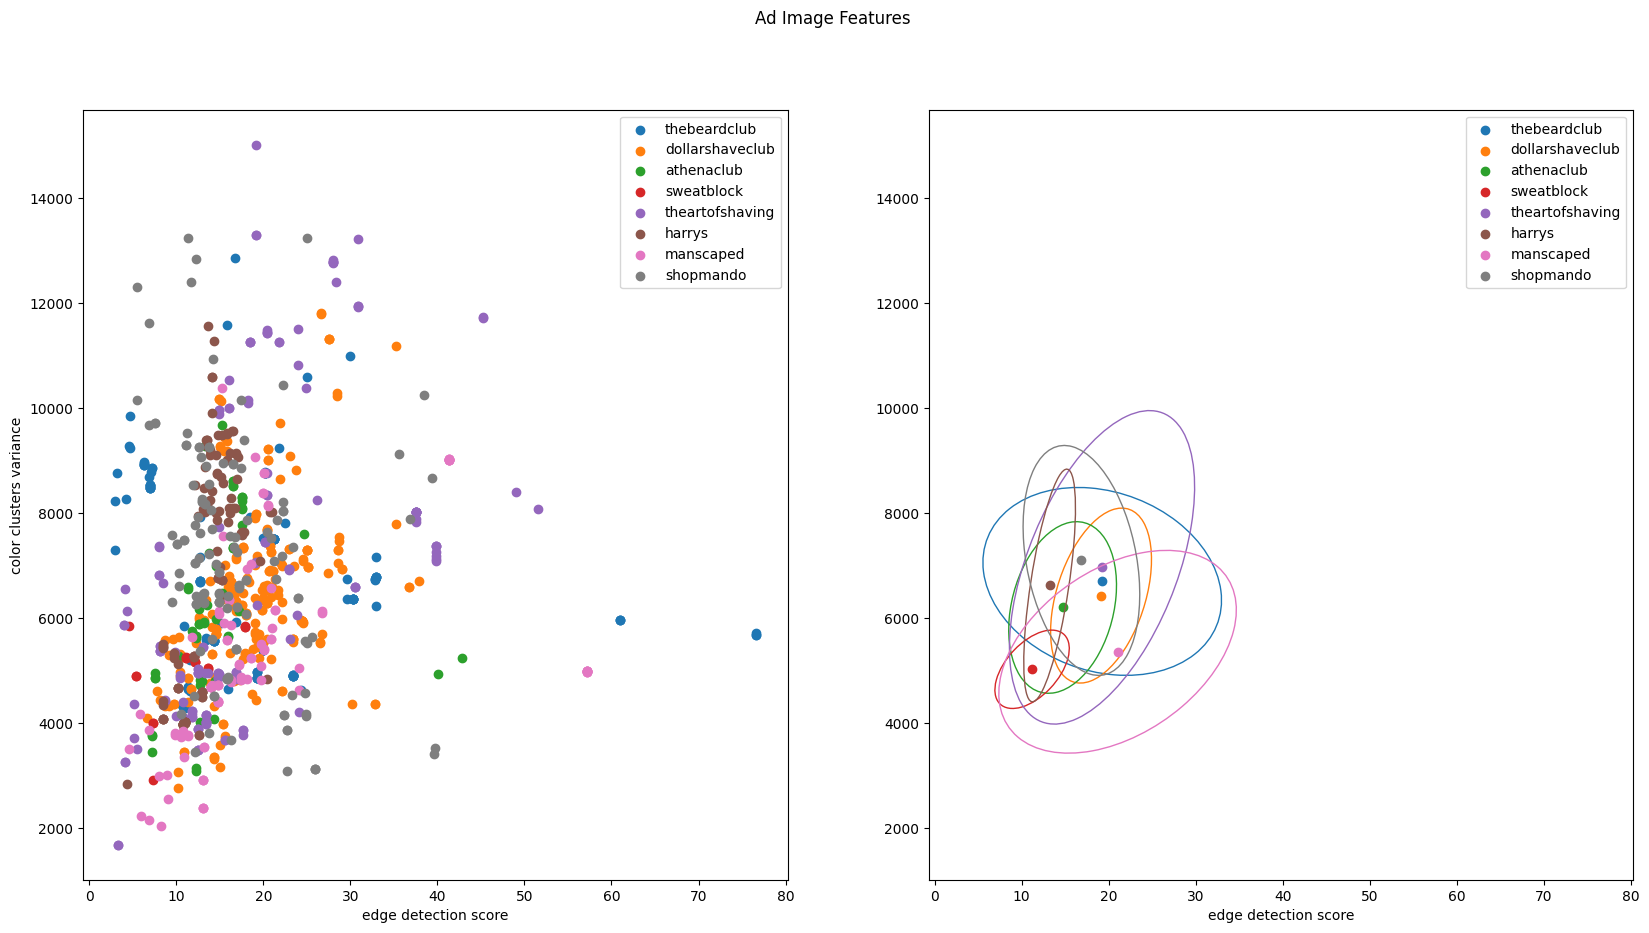

In [2]:
plot_image_features(features_df, "Ad Image Features", companies)

## Novel Tactics

### Thebeardclub: Relatable Human Faces
### Theartofshaving: Artistic/Aspirational Human Faces

Thebeardclub prominently features human faces in ads with simple colors and design to advertise their products through relatability and practicality. 

Theartofshaving also uses many human faces, but these ads are more colorful and visually complex -- they portray their human models in an aspirational light.


These insights are apparent from the image features. When we visualize only the ads that include human faces, we see that only thebeardclub and theartofshaving heavily display human faces -- but the face-including ads from the two companies have greatly distinct distributions.

/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/analysis.py:61: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(x, y)
/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/gautham/Documents/Job Apps/MadMenAI/madmenai-takehome/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


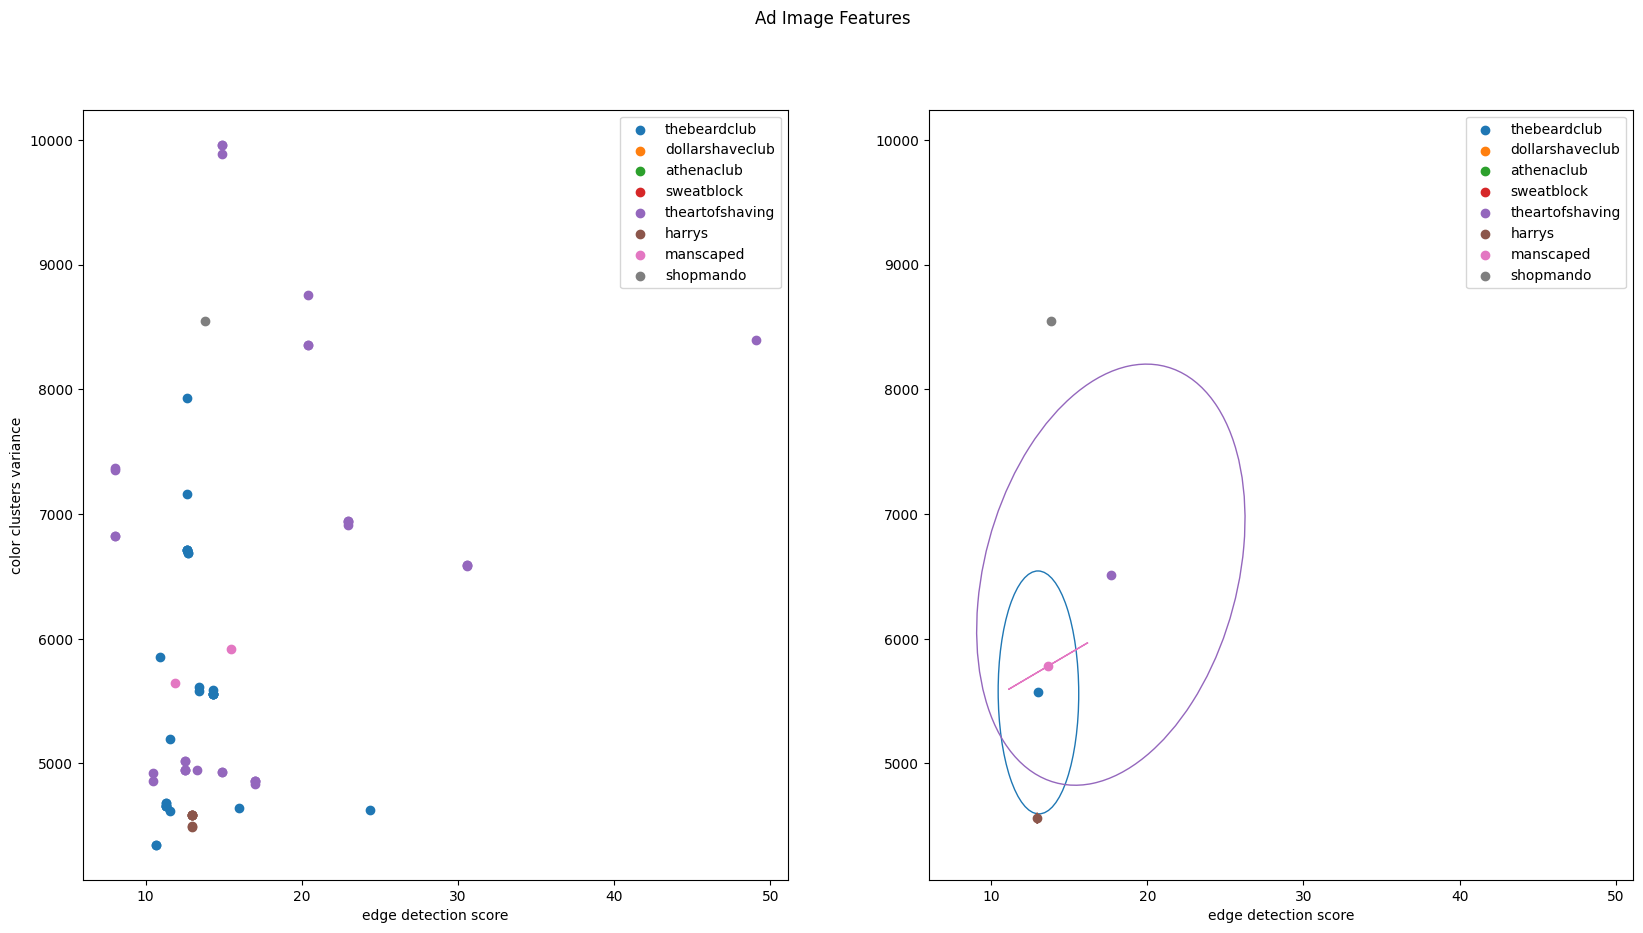

In [18]:
plot_image_features(features_df.loc[features_df["face_detected"] == 1, ], "Ad Image Features", companies)

Notice how diverse the human-face ads from theartofshaving are. These ads span a wide range of color and design complexity.

### Athenaclub: Appeal to Feminine Customers

Athenaclub very strongly directs the language in its ads towards feminine audiences. We see several high-posterior-probability words with strong feminine connotations: "makeover", "pink", "treat", "mom", "she", "pampering", "barbie".

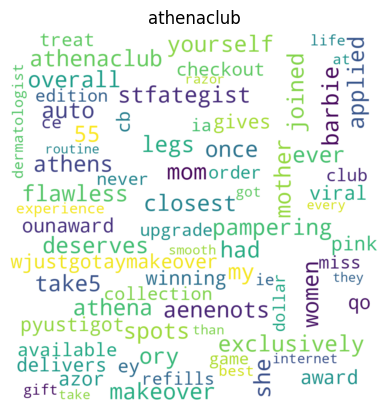

In [6]:
wordcloud_threshold(posteriors_df.loc["athenaclub"], "athenaclub", threshold=0.4)

In [7]:
print(posteriors_df[["makeover", "pink", "treat", "mom", "she", "pampering", "barbie"]])

                 makeover  pink     treat  mom  she  pampering  barbie
label                                                                 
athenaclub            1.0   1.0  0.940194  1.0  1.0        1.0     1.0
dollarshaveclub       0.0   0.0  0.000000  0.0  0.0        0.0     0.0
harrys                0.0   0.0  0.000000  0.0  0.0        0.0     0.0
manscaped             0.0   0.0  0.000000  0.0  0.0        0.0     0.0
shopmando             0.0   0.0  0.000000  0.0  0.0        0.0     0.0
sweatblock            0.0   0.0  0.000000  0.0  0.0        0.0     0.0
theartofshaving       0.0   0.0  0.059806  0.0  0.0        0.0     0.0
thebeardclub          0.0   0.0  0.000000  0.0  0.0        0.0     0.0


Most of these words are entirely disjoint from the ads of other companies.

### Shopmando: Masculine Tone

In contrast, ads from shopmando seem have the most emphasis on masculine tone through their word choice. Words like "kick", "attacks", "bourbon", "control", "groundbreaking", and "powerful" invoke forceful, strong themes of masculinity. There are also words like "balls", "stinky", "pits", "cracks" that speak to crass masculine senses of humor. It is surprising that shopmando has overwhelmingly masculine language, even moreso than the other men's brands.

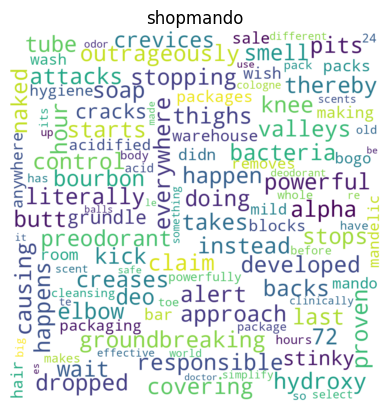

In [11]:
wordcloud_threshold(posteriors_df.loc["shopmando"], "shopmando", threshold=0.4)

In [12]:
print(posteriors_df[["kick", "attacks", "bourbon", "control", "groundbreaking", "powerful", "balls", "stinky", "pits", "cracks"]])

                 kick  attacks  bourbon  control  groundbreaking  powerful  \
label                                                                        
athenaclub        0.0      0.0      0.0      0.0             0.0       0.0   
dollarshaveclub   0.0      0.0      0.0      0.0             0.0       0.0   
harrys            0.0      0.0      0.0      0.0             0.0       0.0   
manscaped         0.0      0.0      0.0      0.0             0.0       0.0   
shopmando         1.0      1.0      1.0      1.0             1.0       1.0   
sweatblock        0.0      0.0      0.0      0.0             0.0       0.0   
theartofshaving   0.0      0.0      0.0      0.0             0.0       0.0   
thebeardclub      0.0      0.0      0.0      0.0             0.0       0.0   

                    balls  stinky  pits  cracks  
label                                            
athenaclub       0.000000     0.0   0.0     0.0  
dollarshaveclub  0.000000     0.0   0.0     0.0  
harrys           0.

### Sweatblock: Technical/Clinical Tone

Sweatblock ads have a unique technical or logical tone through words like "prescription", "protection", "guarantee", "maximum", "clinical", and "safe". They seem to have the most logos-focused ad campaign of all the brands, targeting customers who respond well to factual arguments.

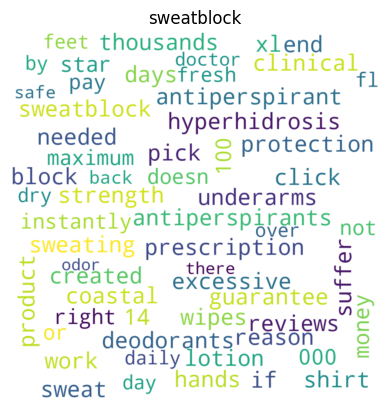

In [14]:
wordcloud_threshold(posteriors_df.loc["sweatblock"], "sweatblock", threshold=0.4)

In [17]:
print(posteriors_df[["prescription", "protection", "guarantee", "maximum", "clinical", "safe"]])

                 prescription  protection  guarantee   maximum  clinical  \
label                                                                      
athenaclub                0.0         0.0   0.000000  0.000000       0.0   
dollarshaveclub           0.0         0.0   0.000000  0.183084       0.0   
harrys                    0.0         0.0   0.000000  0.000000       0.0   
manscaped                 0.0         0.0   0.044453  0.000000       0.0   
shopmando                 0.0         0.0   0.004844  0.000000       0.0   
sweatblock                1.0         1.0   0.950703  0.816916       1.0   
theartofshaving           0.0         0.0   0.000000  0.000000       0.0   
thebeardclub              0.0         0.0   0.000000  0.000000       0.0   

                     safe  
label                      
athenaclub       0.000000  
dollarshaveclub  0.000000  
harrys           0.000000  
manscaped        0.000000  
shopmando        0.488599  
sweatblock       0.511401  
theartofshaving